In [2]:
## Boiler plate code common to many notebooks.  See the TestFilesCommonCode.ipynb for details
from __future__ import print_function
%run TestFilesCommonCode.ipynb

SimpleITK Version: 0.10.0 (ITK 4.10)
Compiled: Jul 27 2016 12:05:49



/Volumes/G-RAID4/software/anaconda/envs/namicAnacondaEnv/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/Volumes/G-RAID4/software/anaconda/envs/namicAnacondaEnv/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


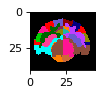

In [5]:
img_labels_filename = '/Volumes/G-RAID1/Ali/catptmr_fmri/input_atlas/felineAtlasFilledIncludeBoneRevised_HD_approved_01162017_bckforcotxmeasure.nii'
img_labels = sitk.ReadImage(img_labels_filename)
img_labels = sitk.Cast(img_labels,sitk.sitkInt16)
myshow(sitk.LabelToRGB(img_labels))

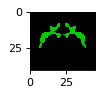

In [6]:
exclusionLabels=((img_labels == 1) + 
                 (img_labels == 6) + 
                 (img_labels == 7) + 
                 (img_labels == 39) + 
                 (img_labels == 40) +
                 (img_labels == 45) +
                 (img_labels == 46) +
                 (img_labels == 78) + 
                 (img_labels == 79) + 
                 (img_labels == 80))
myshow(sitk.LabelToRGB(exclusionLabels))

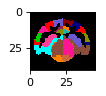

In [10]:
important_labels=img_labels*(1-sitk.Cast(exclusionLabels,sitk.sitkInt16))
size = important_labels.GetSize()
#myshow(sitk.Expand(sitk.LabelToRGB(important_labels[size[0]//2,:,::-1]),[3,3,3]))
myshow(sitk.LabelToRGB(important_labels))

In [11]:
sitk.WriteImage(important_labels,'/Volumes/G-RAID1/Ali/catptmr_fmri/input_atlas/felineAtlas_for_correlationSeed.nii')